In [1]:
import torch
import torchvision.models as models

from Helper_funcs import *

In [2]:
model = models.inception_v3(weights='DEFAULT')
model_aug = models.inception_v3(weights='DEFAULT')
model_name = 'Inception_v3'
input_size = 299

In [3]:
# Load dataset, replace classifier, and display the model architecture
train_loader, val_loader, test_loader = load_dataset(input_size, False)
replace_classifier(model, model_name)
display_model(model, input_size)

Input size = (3, 299, 299)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           C

In [4]:
# train the model
train(model, train_loader, val_loader, ('./models/best_' + model_name + '.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9912
Epoch [1/30], Training Loss: 0.1017 - Validation Loss: 0.0256 - Validation Accuracy: 0.9912
Saving the model with validation accuracy: 0.9931
Epoch [2/30], Training Loss: 0.0532 - Validation Loss: 0.0209 - Validation Accuracy: 0.9931
Saving the model with validation accuracy: 0.9946
Epoch [3/30], Training Loss: 0.0492 - Validation Loss: 0.0158 - Validation Accuracy: 0.9946
Epoch [4/30], Training Loss: 0.0511 - Validation Loss: 0.0346 - Validation Accuracy: 0.9872
Epoch [5/30], Training Loss: 0.0478 - Validation Loss: 0.0158 - Validation Accuracy: 0.9934
Epoch [6/30], Training Loss: 0.0468 - Validation Loss: 0.0326 - Validation Accuracy: 0.9888
Epoch [7/30], Training Loss: 0.0465 - Validation Loss: 0.0167 - Validation Accuracy: 0.9938
Saving the model with validation accuracy: 0.9950
Epoch [8/30], Training Loss: 0.0488 - Validation Loss: 0.0141 - Validation Accuracy: 0.9950
Epoch [9/30], Training

In [5]:
# Load the best preforming model, test classification time and overall accuracy
load_model(model, './models/best_' + model_name + '.pth')
evaluate_time(model)
evaluate_accuracy(model, test_loader)

Predicted class: testing-a, Actual label: testing-a, time: 0.0456
Predicted class: testing-a, Actual label: testing-a, time: 0.0114
Predicted class: testing-b, Actual label: testing-b, time: 0.0127
Predicted class: testing-b, Actual label: testing-b, time: 0.0123
Predicted class: testing-c, Actual label: testing-c, time: 0.0125
Predicted class: testing-c, Actual label: testing-c, time: 0.0115
Predicted class: testing-d, Actual label: testing-d, time: 0.0129
Predicted class: testing-d, Actual label: testing-d, time: 0.0123
Predicted class: testing-e, Actual label: testing-e, time: 0.0124
Predicted class: testing-e, Actual label: testing-e, time: 0.0115
Predicted class: testing-d, Actual label: testing-f, time: 0.0128
Predicted class: testing-a, Actual label: testing-f, time: 0.0133
Average time for prediction: 0.0151 seconds
Overall test accuracy: 95.77%


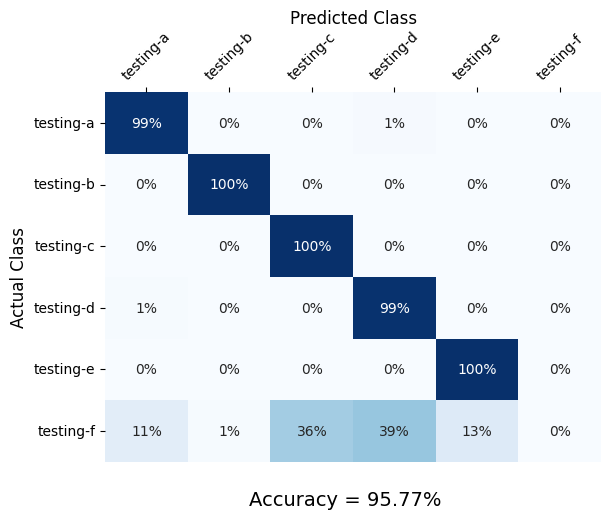

In [6]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model, test_loader)

In [7]:
# Create another model with the augmented dataset
train_loader_aug, val_loader_aug, test_loader_aug = load_dataset(input_size, True)
replace_classifier(model_aug, model_name)

In [8]:
# train the model
train(model_aug, train_loader_aug, val_loader_aug, ('./models/best_' + model_name + '_augmented.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9129
Epoch [1/30], Training Loss: 0.5938 - Validation Loss: 0.2927 - Validation Accuracy: 0.9129
Saving the model with validation accuracy: 0.9274
Epoch [2/30], Training Loss: 0.3393 - Validation Loss: 0.2250 - Validation Accuracy: 0.9274
Saving the model with validation accuracy: 0.9376
Epoch [3/30], Training Loss: 0.2998 - Validation Loss: 0.2064 - Validation Accuracy: 0.9376
Saving the model with validation accuracy: 0.9390
Epoch [4/30], Training Loss: 0.2745 - Validation Loss: 0.1941 - Validation Accuracy: 0.9390
Saving the model with validation accuracy: 0.9399
Epoch [5/30], Training Loss: 0.2656 - Validation Loss: 0.1805 - Validation Accuracy: 0.9399
Saving the model with validation accuracy: 0.9427
Epoch [6/30], Training Loss: 0.2501 - Validation Loss: 0.1685 - Validation Accuracy: 0.9427
Saving the model with validation accuracy: 0.9455
Epoch [7/30], Training Loss: 0.2568 - Validation Loss: 0

In [9]:
# Test the accuracy of the model with augmented data
load_model(model_aug, './models/best_' + model_name + '_augmented.pth')
evaluate_accuracy(model_aug, test_loader_aug)

Overall test accuracy: 94.21%


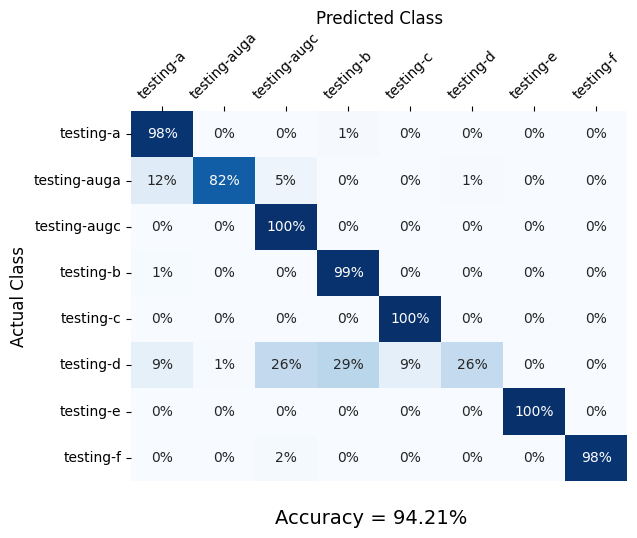

In [10]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model_aug, test_loader_aug)